### Explore selected data sets
- tn.movie_budgets.csv.gz
- tmdb.movies.csv.gz
- imdb.title.basics.csv.gz

### Rationale
- unique index: movie name/title
- create 1 joined data set

### Ideas
- budget vs gross
- create new column for profit (budget - gross)
- release month vs gross/profit
- genre vs vote average (need to investigate movies with multiple genres, will it skew data?)
- genre vs popularity (need to investigate definition of popularity)
- runtime vs profit (genre?)

### Call-outs
- unique movie name/titles (will there be duplicates? reboots?)
- movie name/titles casing (use all lowercase?)
- does worldwide gross include domestic gross?

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Load data

### budget_gross

In [2]:
budget_gross_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [3]:
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### rating

In [5]:
rating_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')

In [6]:
rating_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### runtime_genre

In [8]:
runtime_genre_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')

In [9]:
runtime_genre_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
runtime_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# 3. Data Cleaning

### A. budget_gross

In [11]:
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Action items
- update release_date format
- lowercase movie
- remove '$', ',' and convert from str to int
- rename movie to title
- remove column id

In [12]:
# Update release_date datetime format
budget_gross_df['release_date'] = pd.to_datetime(budget_gross_df['release_date'], infer_datetime_format=True)
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# lowercase movie
budget_gross_df['movie'] = budget_gross_df['movie'].str.lower()
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
# remove'$' from production_budget
budget_gross_df['production_budget'] = budget_gross_df['production_budget'].str.replace('$', '')
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,"425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,"410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark phoenix,"350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,avengers: age of ultron,"330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,"317,000,000","$620,181,382","$1,316,721,747"


In [15]:
# remove ',' from production_budget
budget_gross_df['production_budget'] = budget_gross_df['production_budget'].str.replace(',', '')
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,"$241,063,875","$1,045,663,875"
2,3,2019-06-07,dark phoenix,350000000,"$42,762,350","$149,762,350"
3,4,2015-05-01,avengers: age of ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,"$620,181,382","$1,316,721,747"


In [16]:
# convert production_budget from str to int
budget_gross_df['production_budget'] = budget_gross_df['production_budget'].astype(int)
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 271.2+ KB


In [17]:
# remove'$' from domestic_gross
budget_gross_df['domestic_gross'] = budget_gross_df['domestic_gross'].str.replace('$', '')
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,"760,507,625","$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,"241,063,875","$1,045,663,875"
2,3,2019-06-07,dark phoenix,350000000,"42,762,350","$149,762,350"
3,4,2015-05-01,avengers: age of ultron,330600000,"459,005,868","$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,"620,181,382","$1,316,721,747"


In [18]:
# remove ',' from domestic_gross
budget_gross_df['domestic_gross'] = budget_gross_df['domestic_gross'].str.replace(',', '')
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,"$2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,"$1,045,663,875"
2,3,2019-06-07,dark phoenix,350000000,42762350,"$149,762,350"
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,"$1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,"$1,316,721,747"


In [19]:
# convert domestic_gross from str to int
budget_gross_df['domestic_gross'] = budget_gross_df['domestic_gross'].astype(int)
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 271.2+ KB


In [20]:
# remove'$' from worldwide_gross
budget_gross_df['worldwide_gross'] = budget_gross_df['worldwide_gross'].str.replace('$', '')
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,"2,776,345,279"
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,"1,045,663,875"
2,3,2019-06-07,dark phoenix,350000000,42762350,"149,762,350"
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,"1,403,013,963"
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,"1,316,721,747"


In [21]:
# remove ',' from worldwide_gross
budget_gross_df['worldwide_gross'] = budget_gross_df['worldwide_gross'].str.replace(',', '')
budget_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [22]:
# convert worldwide_gross from str to int
budget_gross_df['worldwide_gross'] = budget_gross_df['worldwide_gross'].astype(int)
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [23]:
# rename movie to title
budget_gross_df = budget_gross_df.rename(columns = {'movie': 'title'})
budget_gross_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [24]:
# remove column id
budget_gross_df = budget_gross_df.drop('id', axis=1)
budget_gross_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


### B. rating

In [25]:
rating_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [26]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Action items:


- delete columns Unnamed: 0, genre_ids, id, original_title, release_date (since budget_gross already has it)
- lowercase title
- change vote_average to int

In [27]:
# delete unnecessary columns
rating_df = rating_df.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_title', 'release_date'],axis=1)
rating_df.head()

,original_language,popularity,title,vote_average,vote_count
0,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,28.734,How to Train Your Dragon,7.7,7610
2,en,28.515,Iron Man 2,6.8,12368
3,en,28.005,Toy Story,7.9,10174
4,en,27.920,Inception,8.3,22186


In [28]:
# lowercase title
rating_df['title'] = rating_df['title'].str.lower()
rating_df.head()

,original_language,popularity,title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


In [29]:
# change vote_average to int
rating_df['vote_average'] = rating_df['vote_average'].astype(float)
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   popularity         26517 non-null  float64
 2   title              26517 non-null  object 
 3   vote_average       26517 non-null  float64
 4   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


### C. runtime_genre

In [30]:
runtime_genre_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Action items

- remove columns: tconst, original title, start_year
- lower case primary_title
- lower case genres
- change primary title to title

In [31]:
# drop columns
runtime_genre_df = runtime_genre_df.drop(['tconst', 'original_title', 'start_year'], axis=1)
runtime_genre_df.head()

,primary_title,runtime_minutes,genres
0,Sunghursh,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,The Other Side of the Wind,122.0,Drama
3,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [32]:
# lowercase primary_title
runtime_genre_df['primary_title'] = runtime_genre_df['primary_title'].str.lower()
runtime_genre_df.head()

,primary_title,runtime_minutes,genres
0,sunghursh,175.0,"Action,Crime,Drama"
1,one day before the rainy season,114.0,"Biography,Drama"
2,the other side of the wind,122.0,Drama
3,sabse bada sukh,NaN,"Comedy,Drama"
4,the wandering soap opera,80.0,"Comedy,Drama,Fantasy"


In [33]:
# lowercase genres
runtime_genre_df['genres'] = runtime_genre_df['genres'].str.lower()
runtime_genre_df.head()

,primary_title,runtime_minutes,genres
0,sunghursh,175.0,"action,crime,drama"
1,one day before the rainy season,114.0,"biography,drama"
2,the other side of the wind,122.0,drama
3,sabse bada sukh,NaN,"comedy,drama"
4,the wandering soap opera,80.0,"comedy,drama,fantasy"


In [34]:
# change column name primary_title to title
runtime_genre_df = runtime_genre_df.rename(columns = {'primary_title': 'title'})
runtime_genre_df.head()

,title,runtime_minutes,genres
0,sunghursh,175.0,"action,crime,drama"
1,one day before the rainy season,114.0,"biography,drama"
2,the other side of the wind,122.0,drama
3,sabse bada sukh,NaN,"comedy,drama"
4,the wandering soap opera,80.0,"comedy,drama,fantasy"


# Merge 3 dataframes into 1 using inner join
- budget_gross_df
- rating_df
- runtime_genre_df

In [35]:
budget_gross_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [36]:
budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 226.0+ KB


In [37]:
rating_df.head()

,original_language,popularity,title,vote_average,vote_count
0,en,33.533,harry potter and the deathly hallows: part 1,7.7,10788
1,en,28.734,how to train your dragon,7.7,7610
2,en,28.515,iron man 2,6.8,12368
3,en,28.005,toy story,7.9,10174
4,en,27.920,inception,8.3,22186


In [38]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   popularity         26517 non-null  float64
 2   title              26517 non-null  object 
 3   vote_average       26517 non-null  float64
 4   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB


In [39]:
runtime_genre_df.head()

,title,runtime_minutes,genres
0,sunghursh,175.0,"action,crime,drama"
1,one day before the rainy season,114.0,"biography,drama"
2,the other side of the wind,122.0,drama
3,sabse bada sukh,NaN,"comedy,drama"
4,the wandering soap opera,80.0,"comedy,drama,fantasy"


In [40]:
runtime_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   title            146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.3+ MB


In [41]:
# merge inner on title
final_df = budget_gross_df.merge(rating_df, on='title').merge(runtime_genre_df, on='title')
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,en,30.579,6.4,8571,136.0,"action,adventure,fantasy"
2,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,en,44.383,7.3,13457,141.0,"action,adventure,sci-fi"
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,"action,adventure,sci-fi"
4,2017-11-17,justice league,300000000,229024295,655945209,en,34.953,6.2,7510,120.0,"action,adventure,fantasy"


In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4714
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4715 non-null   datetime64[ns]
 1   title              4715 non-null   object        
 2   production_budget  4715 non-null   int64         
 3   domestic_gross     4715 non-null   int64         
 4   worldwide_gross    4715 non-null   int64         
 5   original_language  4715 non-null   object        
 6   popularity         4715 non-null   float64       
 7   vote_average       4715 non-null   float64       
 8   vote_count         4715 non-null   int64         
 9   runtime_minutes    4235 non-null   float64       
 10  genres             4639 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 442.0+ KB


### Data cleaning part 2

In [43]:
# Number of NaN values by column
final_df.isna().sum()

release_date           0
title                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
original_language      0
popularity             0
vote_average           0
vote_count             0
runtime_minutes      480
genres                76
dtype: int64

In [44]:
# Drop NaN
final_df.dropna(inplace=True)

In [45]:
final_df.isna().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
original_language    0
popularity           0
vote_average         0
vote_count           0
runtime_minutes      0
genres               0
dtype: int64

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4217 entries, 0 to 4714
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4217 non-null   datetime64[ns]
 1   title              4217 non-null   object        
 2   production_budget  4217 non-null   int64         
 3   domestic_gross     4217 non-null   int64         
 4   worldwide_gross    4217 non-null   int64         
 5   original_language  4217 non-null   object        
 6   popularity         4217 non-null   float64       
 7   vote_average       4217 non-null   float64       
 8   vote_count         4217 non-null   int64         
 9   runtime_minutes    4217 non-null   float64       
 10  genres             4217 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 395.3+ KB


In [47]:
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,en,30.579,6.4,8571,136.0,"action,adventure,fantasy"
2,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,en,44.383,7.3,13457,141.0,"action,adventure,sci-fi"
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,"action,adventure,sci-fi"
4,2017-11-17,justice league,300000000,229024295,655945209,en,34.953,6.2,7510,120.0,"action,adventure,fantasy"


In [48]:
# combining genres as cross-genre
final_df.loc[final_df['genres'].str.contains(','), 'genres'] = 'cross-genre'
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
0,2009-12-18,avatar,425000000,760507625,2776345279,en,26.526,7.4,18676,93.0,horror
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,en,30.579,6.4,8571,136.0,cross-genre
2,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,en,44.383,7.3,13457,141.0,cross-genre
3,2018-04-27,avengers: infinity war,300000000,678815482,2048134200,en,80.773,8.3,13948,149.0,cross-genre
4,2017-11-17,justice league,300000000,229024295,655945209,en,34.953,6.2,7510,120.0,cross-genre


In [49]:
# sort by title ascending
final_df = final_df.sort_values(by='title', ascending=True)
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre


In [50]:
#find duplicate rows
final_df.duplicated().sum()

287

In [51]:
#find duplicates based on release_date and title
duplicate_df = final_df[final_df.duplicated(['release_date', 'title'])] 
duplicate_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
4432,2016-03-01,1982,1000000,0,0,en,0.600,7.5,2,90.0,drama
3435,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,145.0,cross-genre
3436,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,115.0,cross-genre
3437,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,80.0,cross-genre
3438,2011-09-16,3,7200000,59774,295492,en,1.816,6.0,2,57.0,drama
...,...,...,...,...,...,...,...,...,...,...,...
2894,2015-12-04,youth,13000000,2703296,24001573,he,1.008,5.3,9,135.0,cross-genre
2904,2015-12-04,youth,13000000,2703296,24001573,zh,5.082,7.7,27,135.0,cross-genre
2903,2015-12-04,youth,13000000,2703296,24001573,zh,5.082,7.7,27,124.0,drama
2902,2015-12-04,youth,13000000,2703296,24001573,zh,5.082,7.7,27,124.0,cross-genre


In [52]:

final_df = final_df.drop_duplicates(['release_date','title'], keep = 'first')

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 4312 to 216
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1879 non-null   datetime64[ns]
 1   title              1879 non-null   object        
 2   production_budget  1879 non-null   int64         
 3   domestic_gross     1879 non-null   int64         
 4   worldwide_gross    1879 non-null   int64         
 5   original_language  1879 non-null   object        
 6   popularity         1879 non-null   float64       
 7   vote_average       1879 non-null   float64       
 8   vote_count         1879 non-null   int64         
 9   runtime_minutes    1879 non-null   float64       
 10  genres             1879 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 176.2+ KB


In [54]:
final_df.tail()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
3766,2015-08-28,zipper,4500000,0,0,en,9.373,5.7,85,112.0,cross-genre
1099,2011-07-08,zookeeper,80000000,80360866,170805525,en,10.764,5.3,886,102.0,cross-genre
1435,2016-02-12,zoolander 2,50000000,28848693,55348693,en,12.997,4.7,1374,101.0,comedy
1824,2006-08-11,zoom,35000000,11989328,12506188,en,3.434,5.5,43,158.0,cross-genre
216,2016-03-04,zootopia,150000000,341268248,1019429616,en,27.549,7.7,9977,108.0,cross-genre


In [55]:
#find duplicate rows
final_df.duplicated().sum()

0

In [56]:
final_df.duplicated(['title', 'release_date']).sum()

0

In [57]:
final_df.duplicated('title').sum()

52

In [58]:
title_test_df = final_df[final_df.duplicated('title', keep = False)]
title_test_df

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres
1752,2010-04-30,a nightmare on elm street,35000000,63075011,117729621,en,9.795,5.5,1408,95.0,cross-genre
1753,1984-11-09,a nightmare on elm street,1800000,25504513,25504513,en,9.795,5.5,1408,95.0,cross-genre
74,1951-07-28,alice in wonderland,3000000,0,0,en,22.020,6.6,8713,48.0,documentary
72,2010-03-05,alice in wonderland,200000000,334191110,1025491110,en,0.600,6.0,1,99.0,cross-genre
187,1991-11-13,beauty and the beast,20000000,376057266,608431132,en,31.793,6.9,11023,112.0,cross-genre
...,...,...,...,...,...,...,...,...,...,...,...
2627,1996-02-23,unforgettable,18000000,2483790,2483790,en,8.323,5.5,310,130.0,cross-genre
1605,2011-02-18,unknown,40000000,63686397,136123083,en,12.080,6.6,2043,113.0,cross-genre
1609,2006-11-03,unknown,3700000,26403,3355048,en,12.080,6.6,2043,113.0,cross-genre
897,2018-10-05,venom,116000000,213511408,853628605,en,44.007,6.6,6206,112.0,cross-genre


I think this solves for the duplicates. There titles that have been recreated based on release_year (reboots).

### Start adding rows ie profit, release_month, release_year

In [59]:
#add profit = worldwide_gross - production_budget

final_df['profit'] = final_df['worldwide_gross'] - final_df['production_budget']
final_df['profit'].astype(int)
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343


In [60]:
#add release_date month
final_df['release_month'] = pd.DatetimeIndex(final_df['release_date']).month
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000,11
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422,3
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384,11
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378,1
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343,10


In [61]:
#add release_date year
final_df['release_year'] = pd.DatetimeIndex(final_df['release_date']).year
final_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,runtime_minutes,genres,profit,release_month,release_year
4312,2015-11-20,#horror,1500000,0,0,de,6.099,3.3,102,101.0,cross-genre,-1500000,11,2015
3611,2016-03-11,10 cloverfield lane,5000000,72082999,108286422,en,17.892,6.9,4629,103.0,cross-genre,103286422,3,2016
3004,2015-11-11,10 days in a madhouse,12000000,14616,14616,en,0.955,5.4,7,111.0,drama,-11985384,11,2015
1761,2018-01-19,12 strong,35000000,45819713,71118378,en,13.183,5.6,1312,130.0,cross-genre,36118378,1,2018
2433,2013-10-18,12 years a slave,20000000,56671993,181025343,en,16.493,7.9,6631,134.0,cross-genre,161025343,10,2013


In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1879 entries, 4312 to 216
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1879 non-null   datetime64[ns]
 1   title              1879 non-null   object        
 2   production_budget  1879 non-null   int64         
 3   domestic_gross     1879 non-null   int64         
 4   worldwide_gross    1879 non-null   int64         
 5   original_language  1879 non-null   object        
 6   popularity         1879 non-null   float64       
 7   vote_average       1879 non-null   float64       
 8   vote_count         1879 non-null   int64         
 9   runtime_minutes    1879 non-null   float64       
 10  genres             1879 non-null   object        
 11  profit             1879 non-null   int64         
 12  release_month      1879 non-null   int64         
 13  release_year       1879 non-null   int64         
dtypes: dat

### Data Vis

1. production_budget vs profit

In [66]:
final_df.describe()

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,runtime_minutes,profit,release_month,release_year
count,1.879000e+03,1.879000e+03,1.879000e+03,1879.000000,1879.000000,1879.000000,1879.000000,1.879000e+03,1879.000000,1879.000000
mean,3.857759e+07,4.866274e+07,1.199858e+08,11.014825,6.185045,1721.489090,103.420436,8.140817e+07,6.893560,2011.997871
std,5.227705e+07,8.027918e+07,2.227130e+08,8.272648,1.088420,2710.819308,21.091007,1.835953e+08,3.471833,7.624857
min,9.000000e+03,0.000000e+00,0.000000e+00,0.600000,0.000000,1.000000,1.000000,-1.104502e+08,1.000000,1915.000000
25%,5.000000e+06,1.020641e+06,3.413546e+06,6.193500,5.600000,91.500000,92.000000,-1.512077e+06,4.000000,2011.000000
50%,2.000000e+07,2.053714e+07,3.802823e+07,9.620000,6.200000,673.000000,102.000000,1.394305e+07,7.000000,2013.000000
75%,4.700000e+07,5.814851e+07,1.236893e+08,14.476500,6.900000,2107.000000,115.000000,7.782303e+07,10.000000,2015.000000
max,4.250000e+08,7.605076e+08,2.776345e+09,80.773000,10.000000,22186.000000,180.000000,2.351345e+09,12.000000,2019.000000


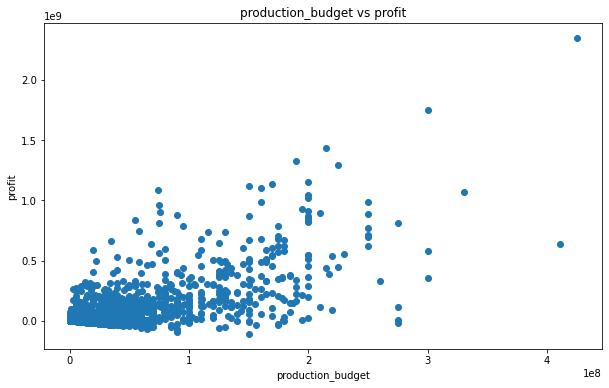

In [71]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = final_df['production_budget'], y = final_df['profit'])
plt.xlabel('production_budget')
plt.ylabel('profit')
plt.title('production_budget vs profit')

plt.show()

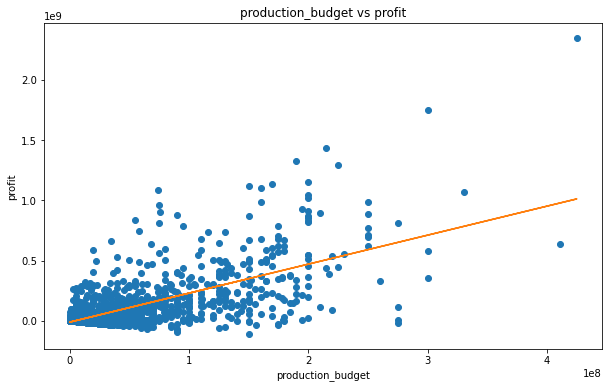

In [79]:
fig, ax = plt.subplots(figsize = (10, 6))
x = final_df['production_budget']
y = final_df['profit']
ax.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x+b)
plt.xlabel('production_budget')
plt.ylabel('profit')
plt.title('production_budget vs profit')
plt.show()

In [ ]:
#can slope determine what best production_budget_ratio
print()